## CAPSTONE Project: Image Classification using CIFAR - 10 dataset using CNN

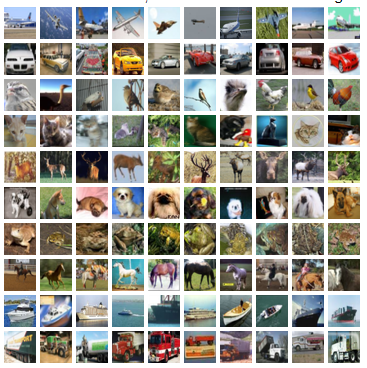

## Problem Statement:

Object classification using CIFAR-10 with a CNN model.

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

## Step 1: Load and preprocess the CIFAR-10 dataset

In [81]:
# Step 1: Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [82]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [83]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [84]:
# Define class names
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

## Step 2: Build the CNN model

In [85]:
# Step 2: Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

## Step 3: Compile the model

In [86]:
# Step 3: Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Step 4: Train the model

In [87]:
# Step 4: Train the model 
# Approximate time it took on my local machine for 10 epoch and batch size 64: 10 minutes
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.2942 - loss: 1.8924 - val_accuracy: 0.5151 - val_loss: 1.3497
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.5119 - loss: 1.3659 - val_accuracy: 0.5962 - val_loss: 1.1344
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5843 - loss: 1.1791 - val_accuracy: 0.6291 - val_loss: 1.0510
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.6310 - loss: 1.0523 - val_accuracy: 0.6673 - val_loss: 0.9450
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.6614 - loss: 0.9633 - val_accuracy: 0.6876 - val_loss: 0.8975
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.6848 - loss: 0.8999 - val_accuracy: 0.6935 - val_loss: 0.8925
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 107ms/step - accuracy: 0.7040 - loss: 0.8421 - val_accuracy: 0.7092 - val_loss: 0.8497
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 105s 134ms/step - accuracy: 0.7254 - loss: 0.7874

## Step 5: Evaluate the model

In [88]:
# Step 5: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 9s - 28ms/step - accuracy: 0.7329 - loss: 0.7867
Test accuracy: 0.7329000234603882


## Step 6: Visualize training history

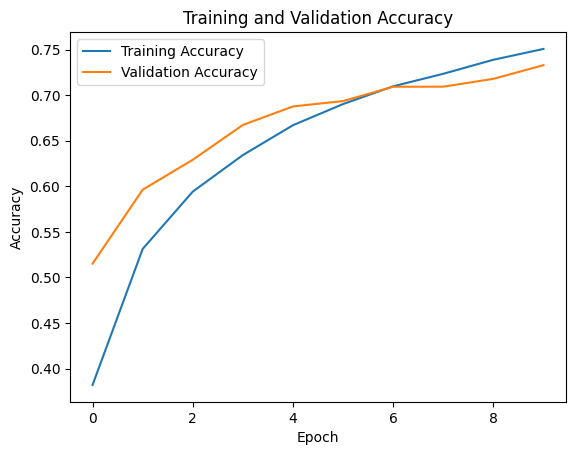

In [89]:
# Step 6: Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

## Step 7: Save the model after training

In [90]:
# Step 7: Save the model after training
model.save('cifar10_cnn_model.keras')
print("Model saved to 'cifar10_cnn_model.keras'")

Model saved to 'cifar10_cnn_model.keras'


## Step 8: Load the trained model

In [91]:
# Step 8: Load the trained model
model = tf.keras.models.load_model('cifar10_cnn_model.keras')
print("Model loaded successfully.")

Model loaded successfully.


## Step 9: Predicting the class of external image - Using Static Image URL

In [92]:
# Step 9a.: Test the model with a new image

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import requests
from PIL import Image
from io import BytesIO

In [99]:
def preprocess_image_from_url(image_url):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    display(img)
    img = img.resize((32, 32))
    img_array = img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0)

def predict_image_class(image_url):
    img_array = preprocess_image_from_url(image_url)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    return predicted_class

### Load an external image, preprocess it, and predict its class

### Test 1 : Cat

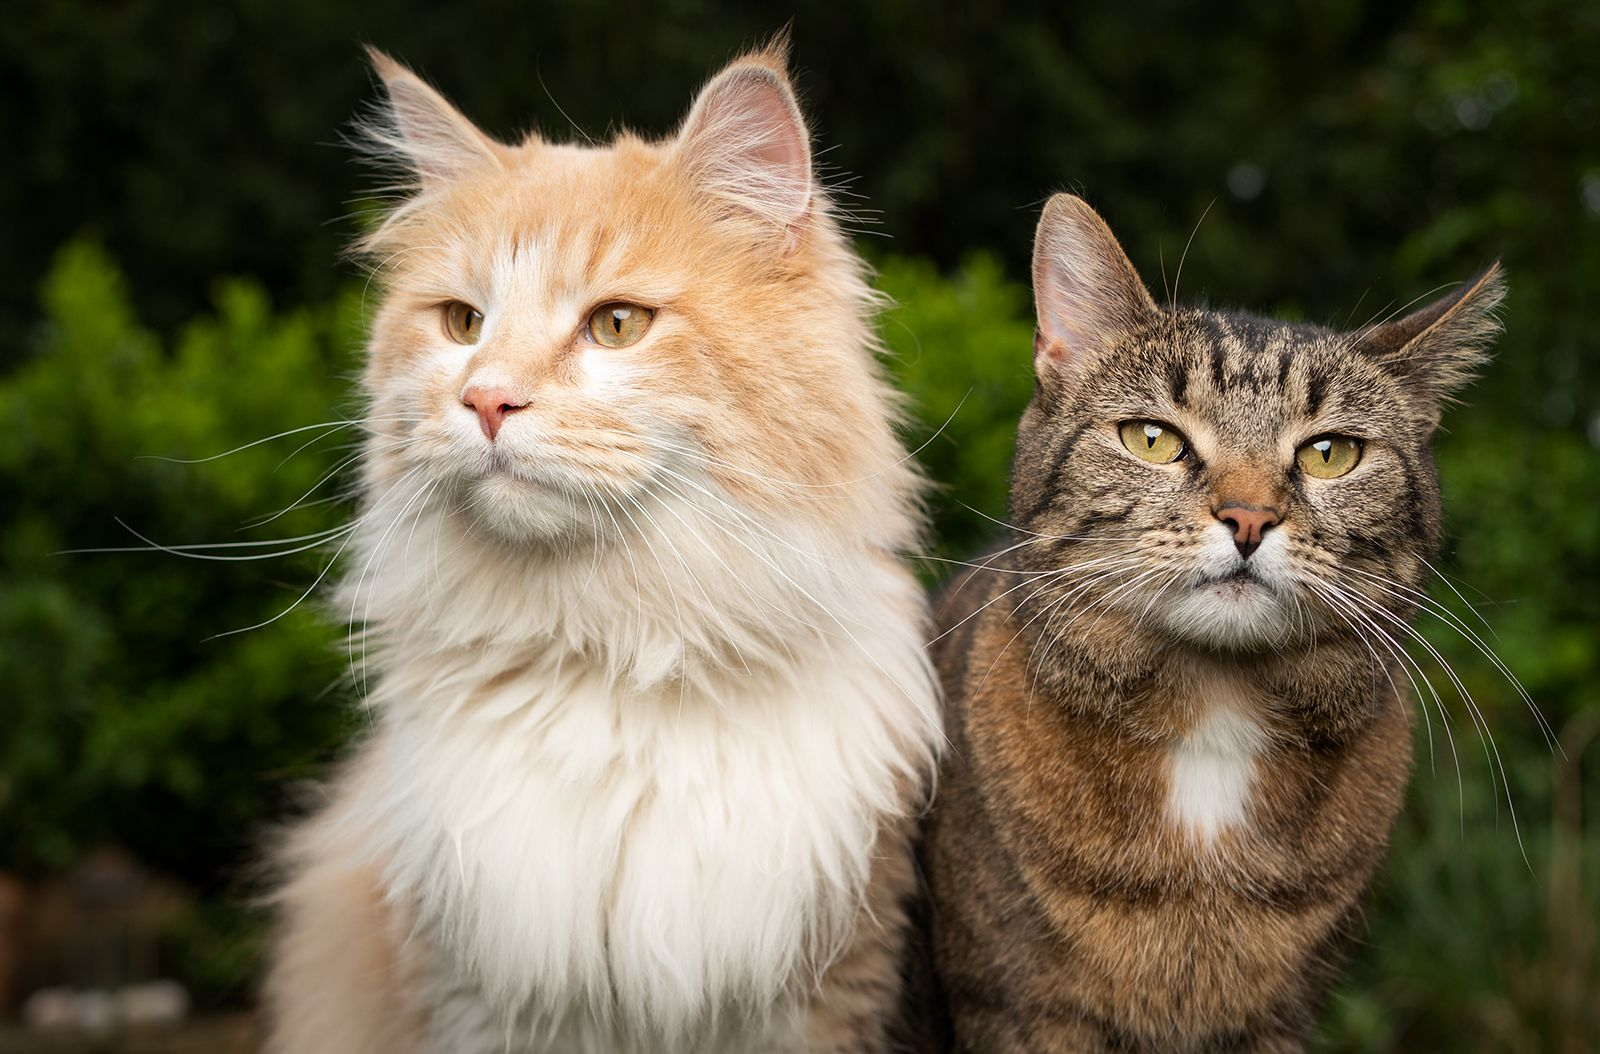

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class: 3
Predicted class name:  Cat


In [100]:
url_image = 'https://cdn.britannica.com/34/235834-050-C5843610/two-different-breeds-of-cats-side-by-side-outdoors-in-the-garden.jpg'
predicted_class = predict_image_class(url_image)
print(f"Predicted class: {predicted_class}")


predicted_class_name = class_names[predicted_class]
print(f"Predicted class name:  {predicted_class_name}")

### Test 2 : Horse

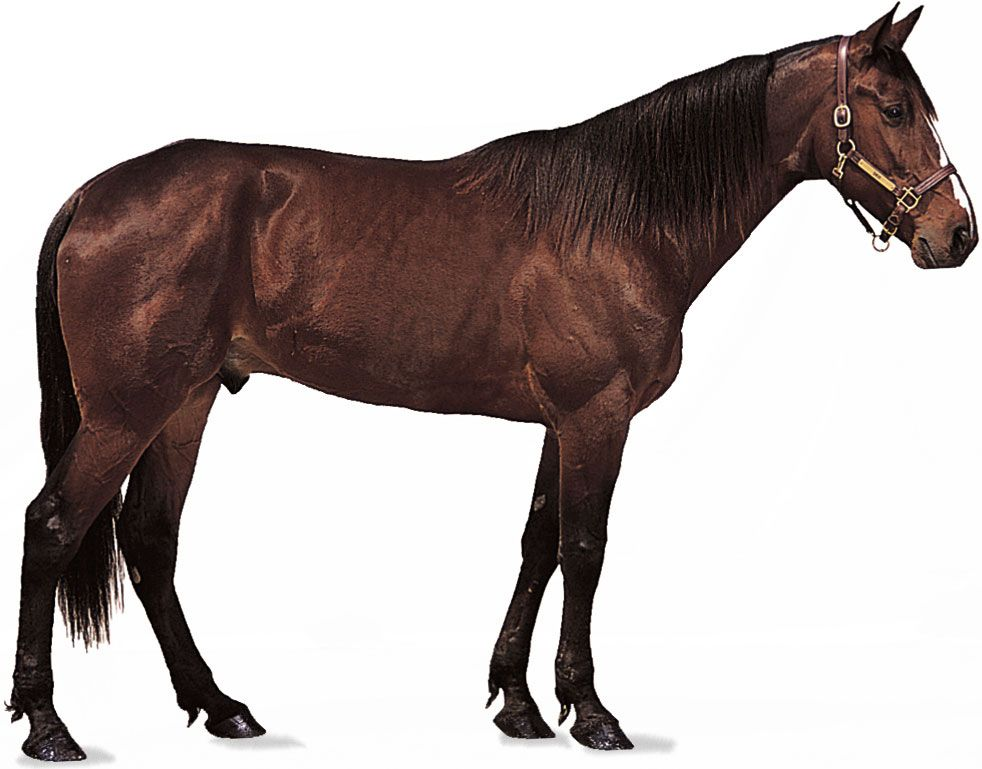

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted class: 7
Predicted class name:  Horse


In [104]:
url_image = 'https://cdn.britannica.com/96/1296-050-4A65097D/gelding-bay-coat.jpg'
predicted_class = predict_image_class(url_image)
print(f"Predicted class: {predicted_class}")


predicted_class_name = class_names[predicted_class]
print(f"Predicted class name:  {predicted_class_name}")